In [1]:
#importing the libraries
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
data=pd.read_csv(r"C:\Users\vyshn\Downloads\daily_csv.csv")
data

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [3]:
#dimensions and structure
data.shape

(5953, 2)

In [4]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [5]:
data.tail()

,Date,Price
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30
5952,2020-09-01,2.22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [7]:
#Basic statistics
data.describe()

,Price
count,5952.000000
mean,4.184644
std,2.190361
min,1.050000
25%,2.650000
50%,3.530000
75%,5.240000
max,18.480000


In [8]:
#Exploration of individual varibles
print("Mean:", data['Price'].mean())
print("Median:", data['Price'].median())
print("Mode:", data['Price'].mode())

Mean: 4.184643817204301
Median: 3.53
Mode: 0    2.75
Name: Price, dtype: float64


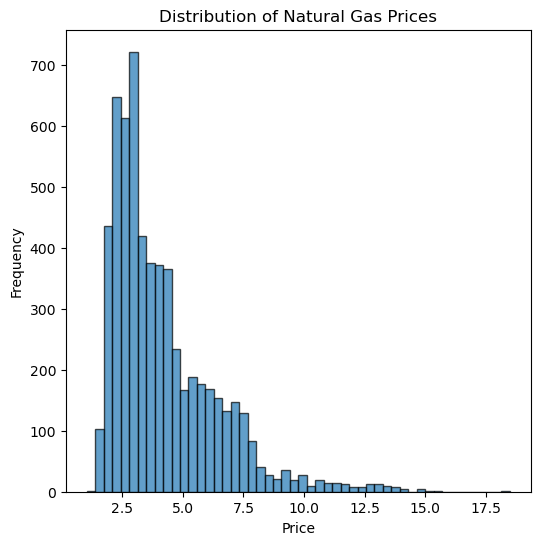

In [9]:
import matplotlib.pyplot as plt

# Distribution of natural gas prices
plt.figure(figsize=(6, 6))
plt.hist(data['Price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Natural Gas Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

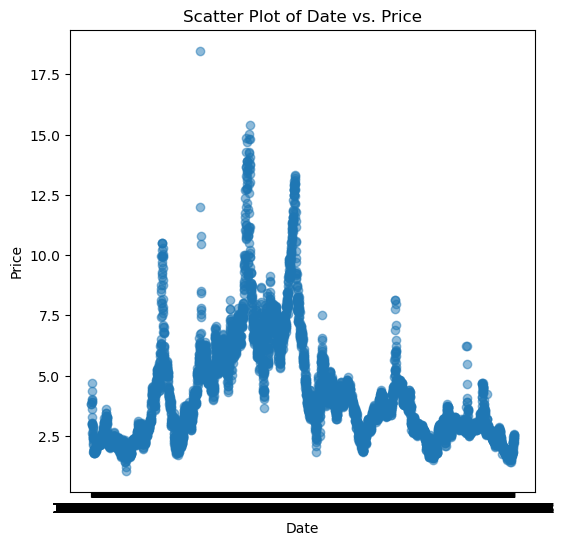

In [10]:
import seaborn as sns

# Scatter plot between Date and Price
plt.figure(figsize=(6, 6))
plt.scatter(data['Date'], data['Price'], alpha=0.5)
plt.title('Scatter Plot of Date vs. Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
data.sort_values('Date', inplace=True)

In [12]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
# Extract day, month, and year into separate columns
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [14]:
data

,Date,Price,Day,Month,Year
0,1997-01-07,3.82,7,1,1997
1,1997-01-08,3.80,8,1,1997
2,1997-01-09,3.61,9,1,1997
3,1997-01-10,3.92,10,1,1997
4,1997-01-13,4.00,13,1,1997
...,...,...,...,...,...
5948,2020-08-26,2.52,26,8,2020
5949,2020-08-27,2.52,27,8,2020
5950,2020-08-28,2.46,28,8,2020
5951,2020-08-31,2.30,31,8,2020


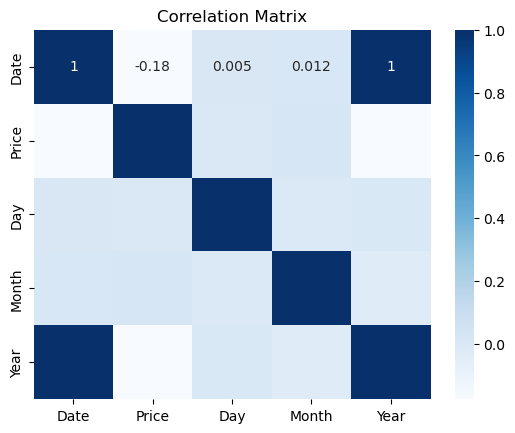

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

C:\Users\vyshn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vyshn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vyshn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vyshn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

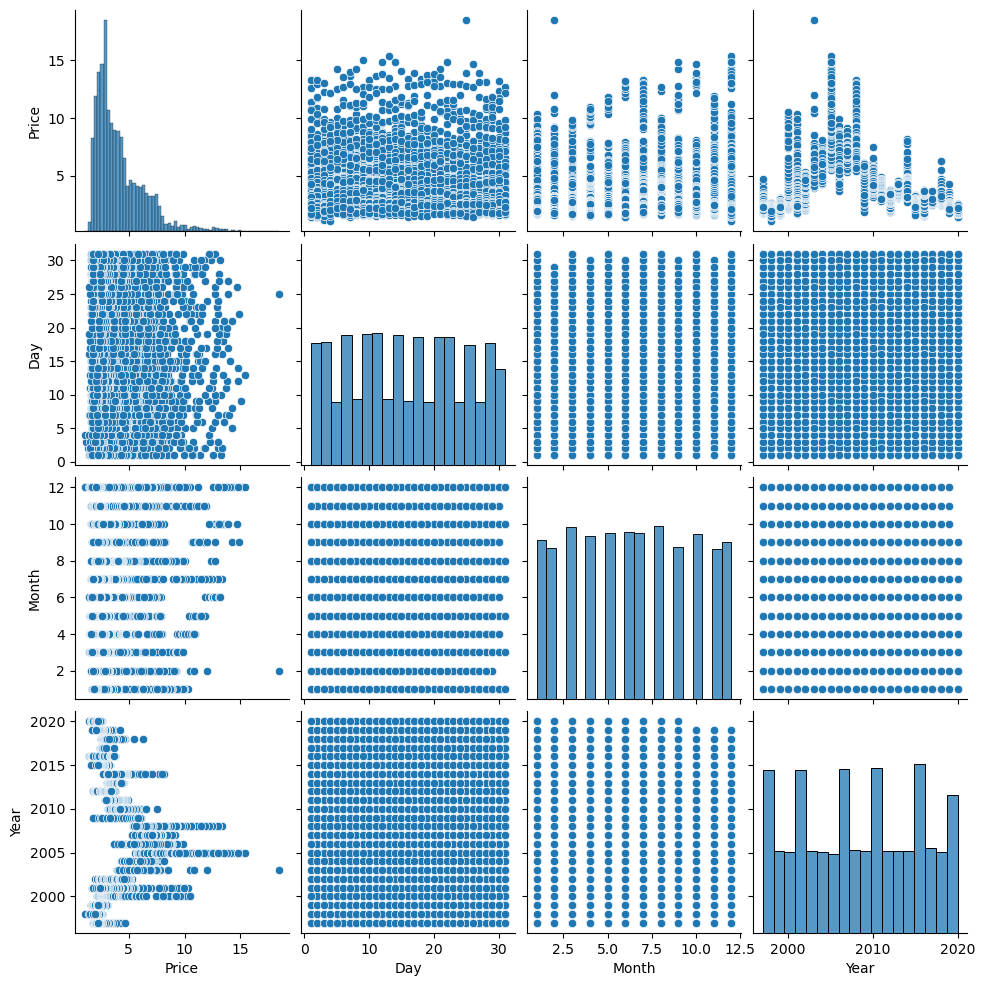

In [16]:
# Pair plot to see pairwise relationships between multiple variables
sns.pairplot(data)
plt.show()


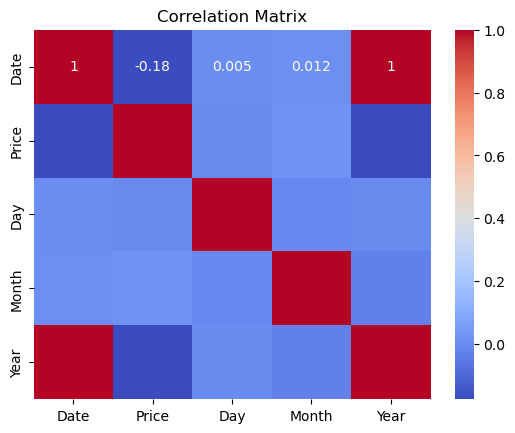

In [17]:
# Correlation matrix for multivariate analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

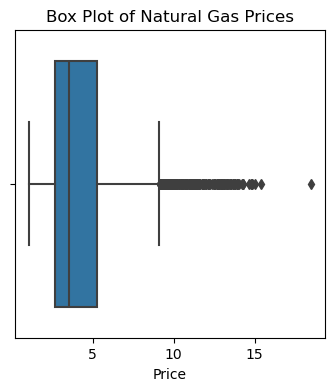

In [18]:
# Box plot to identify outliers in price
plt.figure(figsize=(4, 4))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of Natural Gas Prices')
plt.show()

In [19]:
# Removing outliers
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
ata = data[(data['Price'] >= Q1 - 1.5 * IQR) & (data['Price'] <= Q3 + 1.5 * IQR)]
print("Shape after removing outliers:", data.shape)

Shape after removing outliers: (5953, 5)


In [21]:
# Identify missing values
print(data.isnull().sum())

Date     0
Price    1
Day      0
Month    0
Year     0
dtype: int64


In [22]:
print(data.isnull().any())

Date     False
Price     True
Day      False
Month    False
Year     False
dtype: bool


In [23]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

In [24]:
print(data.isnull().any())

Date     False
Price    False
Day      False
Month    False
Year     False
dtype: bool


In [25]:
data

,Date,Price,Day,Month,Year
0,1997-01-07,3.82,7,1,1997
1,1997-01-08,3.80,8,1,1997
2,1997-01-09,3.61,9,1,1997
3,1997-01-10,3.92,10,1,1997
4,1997-01-13,4.00,13,1,1997
...,...,...,...,...,...
5948,2020-08-26,2.52,26,8,2020
5949,2020-08-27,2.52,27,8,2020
5950,2020-08-28,2.46,28,8,2020
5951,2020-08-31,2.30,31,8,2020


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scaler
minmax_scaler = MinMaxScaler()

In [31]:
# Assuming 'Price' is the column to be sca
data['Price'] = minmax_scaler.fit_transform(data[['Price']])


In [32]:
data

,Date,Price,Day,Month,Year
0,1997-01-07,0.158921,7,1,1997
1,1997-01-08,0.157774,8,1,1997
2,1997-01-09,0.146873,9,1,1997
3,1997-01-10,0.164659,10,1,1997
4,1997-01-13,0.169248,13,1,1997
...,...,...,...,...,...
5948,2020-08-26,0.084337,26,8,2020
5949,2020-08-27,0.084337,27,8,2020
5950,2020-08-28,0.080895,28,8,2020
5951,2020-08-31,0.071715,31,8,2020


In [33]:
#feature engineering
# Create lagged features
data['Price_lag1'] = data['Price'].shift(1)
data['Price_lag7'] = data['Price'].shift(7)

In [34]:
# Create rolling mean features
data['Price_rolling_mean7'] = data['Price'].rolling(window=7).mean()

In [35]:
# Drop rows with NaN values generated by lagging
data.dropna(inplace=True)


In [36]:
data.drop('Date',axis=1, inplace=True)

In [37]:
# Display the first few rows to verify feature engineering
print(data.head())

       Price  Day  Month  Year  Price_lag1  Price_lag7  Price_rolling_mean7
7   0.209983   16      1  1997    0.188755    0.158921             0.172445
8   0.164085   17      1  1997    0.209983    0.157774             0.173346
9   0.126793   20      1  1997    0.164085    0.146873             0.170478
10  0.111302   21      1  1997    0.126793    0.164659             0.162856
11  0.114745   22      1  1997    0.111302    0.169248             0.155069


In [38]:
#Save Processed Data
data.to_csv('preprocessed_natural_gas_prices.csv', index=False)

In [39]:
# Verify by loading the saved file
processed_data = pd.read_csv('preprocessed_natural_gas_prices.csv')
print(processed_data.head())

      Price  Day  Month  Year  Price_lag1  Price_lag7  Price_rolling_mean7
0  0.209983   16      1  1997    0.188755    0.158921             0.172445
1  0.164085   17      1  1997    0.209983    0.157774             0.173346
2  0.126793   20      1  1997    0.164085    0.146873             0.170478
3  0.111302   21      1  1997    0.126793    0.164659             0.162856
4  0.114745   22      1  1997    0.111302    0.169248             0.155069


In [40]:
pd.read_csv(r'preprocessed_natural_gas_prices.csv')

,Price,Day,Month,Year,Price_lag1,Price_lag7,Price_rolling_mean7
0,0.209983,16,1,1997,0.188755,0.158921,0.172445
1,0.164085,17,1,1997,0.209983,0.157774,0.173346
2,0.126793,20,1,1997,0.164085,0.146873,0.170478
3,0.111302,21,1,1997,0.126793,0.164659,0.162856
4,0.114745,22,1,1997,0.111302,0.169248,0.155069
...,...,...,...,...,...,...,...
5941,0.084337,26,8,2020,0.085485,0.072863,0.081141
5942,0.084337,27,8,2020,0.084337,0.080321,0.081715
5943,0.080895,28,8,2020,0.084337,0.079174,0.081960
5944,0.071715,31,8,2020,0.080895,0.074584,0.081551
